In [1]:

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Phased LSTM Implementation for Time Series

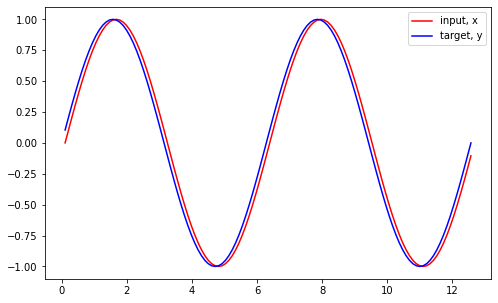

In [2]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 120

# generate evenly spaced data pts
time_steps = np.linspace(0, 4*np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# display the data
plt.plot(time_steps[1:], x, 'r-', label='input, x') # x
plt.plot(time_steps[1:], y, 'b-', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [4]:
from models.plstm import PhasedLSTM
input_size=1 
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = PhasedLSTM(input_size, hidden_dim)
print(rnn)

PhasedLSTM(
  (lstm): LSTM(1, 32, batch_first=True, bidirectional=True)
  (phased_cell): PhasedLSTMCell()
)


In [5]:
# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [6]:
time_steps = np.linspace(0,  16 * np.pi, seq_length + 1)

def train(rnn, n_steps, print_every):
    train_loss=[]
    # initialize the hidden state
    hidden = None      
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 
        
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        #prediction, hidden = rnn(x_tensor, hidden)
        prediction = rnn(x_tensor)
        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        #hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        loss_item = loss.item()
        train_loss.append(loss_item)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()
        
        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Epoch:  {0} | Loss: {1}'.format(batch_i,loss_item) )
            #print(prediction[:,:,1].shape)
            #print(y_tensor.shape)
            #print(x.shape)
            plt.plot(time_steps[1:], x, 'r-')  # input
            plt.plot(time_steps[1:], prediction[:,:,-1].detach().numpy().flatten(), 'b-')  # predictions
            plt.show()
    
    return rnn, train_loss

Epoch:  0 | Loss: 0.09255897253751755


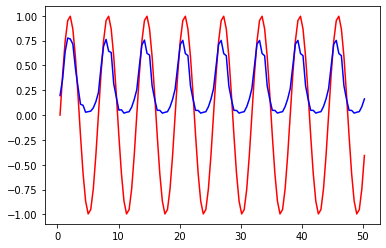

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  20 | Loss: 0.0844748243689537


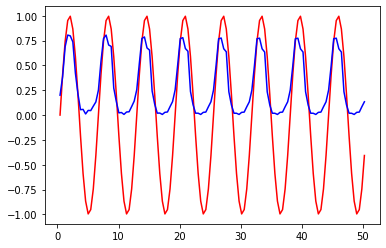

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  40 | Loss: 0.07766267657279968


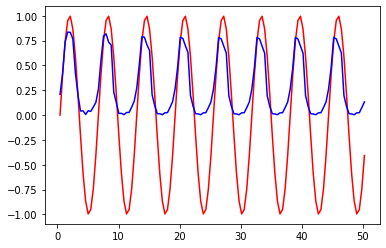

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  60 | Loss: 0.07173288613557816


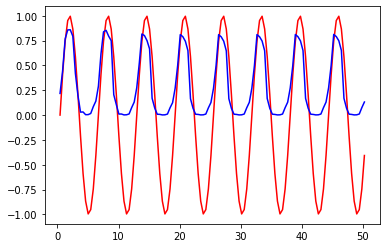

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  80 | Loss: 0.06796442717313766


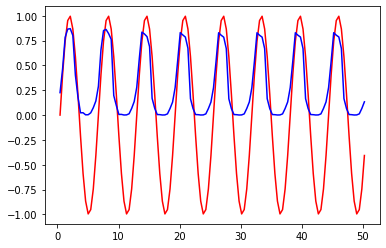

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  100 | Loss: 0.06374547630548477


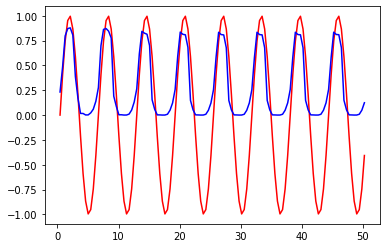

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [10]:

# train the rnn and monitor results
n_steps = 110
print_every = 20

trained_rnn, train_loss = train(rnn, n_steps, print_every)

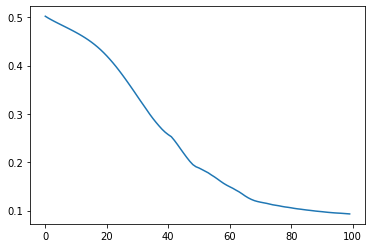

In [8]:
plt.plot(train_loss)